## Antony Owino. Final Paper. 13<sup>th</sup> Dec 2017. Notebook 3.

#### NB: Assumes the [first notebook (*Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb* )](Analysis of Viewers Searching for Music Heard On Contemporary TV.ipynb) has been run to generate required files.

The use of classical instruments in TV songs and music as observed in the analysis of questions by the viewers. This notebook explores the instruments mentioned to examine the trends and contexts.

In [1]:
import csv, os
from itertools import groupby
from operator import itemgetter
from pprint import pprint

current_working_dir = os.getcwd()

shows = ["Supernatural",
         "Game of Thrones",
         "The Walking Dead",
         "Stranger Things",
         "Grey's Anatomy",
         "Arrow",
         "Suits",
         "The Originals",
         "Pretty Little Liars"]

def extract_questions_as_text(show_file_path):
    '''
    This function extracts all the questions in a given file as
    a concatenated string.
    show_file_path - Path to the file
    '''
    questions_text = ''
    with open(show_file, 'r') as file: # This makes sure that file is closed after reading
        data = csv.reader(file)
        next(data) #  skip the header row
        for row in data:
            questions_text += row[1] # This puts all the data into a list
        file.close() 
    return questions_text

all_shows_questions_file = os.path.join(current_working_dir, "all_shows_questions_only.csv")

shows_questions_list = [] # list to hold all questions per show
for show_name in shows:
    show_file = os.path.join(all_shows_questions_file)
    shows_questions_list.append(extract_questions_as_text(show_file))

### Dispersion plot of use musical instruments over time [2011 - 2017] on all the TV shows

The `shows_questions_list` contains questions from the shows dataset, sorted using timestamp of when the question was posted. The resultant dispersion is derived from a chronological examination of the dataset.

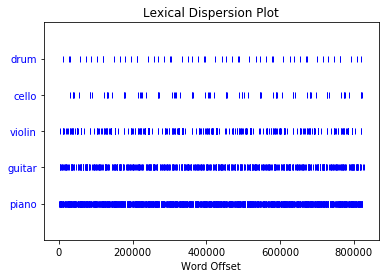

In [2]:
import nltk
import re
from collections import Counter

shows_questions_text = ' '.join(shows_questions_list)

word_tokens = re.findall(r'[\w]+', shows_questions_text) # using regez for word
#word_tokens = re.findall(r'[A-Z][A-Za-z\'\-]+', shows_questions_text) # using regex version 2
#word_tokens = nltk.word_tokenize(questions_text) # using nltk
#lower_case_tokens = [token.lower() for token in word_tokens if token[0].isalpha()]
lower_case_tokens = [token.lower() for token in word_tokens]

stopwords = set(nltk.corpus.stopwords.words('english'))
# add custom stopwords including character names
stopwords.update(('harvey','mike','meredith','louis','oliver','rachel'))

# tabulated word coun
word_freqs = nltk.FreqDist(lower_case_tokens)

tokenized_words = [word for word in lower_case_tokens if word not in stopwords]
the_word_count = Counter(tokenized_words)
top_words = the_word_count.most_common(30)

# This creates a NLTK text object from a list of tokens
text_obj = nltk.Text(lower_case_tokens)

text_obj.dispersion_plot(['drum', 'cello', 'violin', 'guitar', 'piano'])

### Dispersion plot of use sentiment keywords over time [2011 - 2017] on all the TV shows

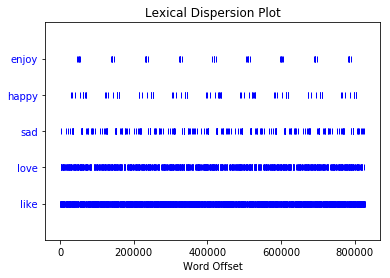

In [3]:
text_obj.dispersion_plot(['enjoy', 'happy', 'sad', 'love', 'like'])

### Explore concordances for musical instruments identified by the viewers

In [4]:
for index, show_questions in enumerate(shows_questions_list):
    #word_tokens = re.findall(r'[\w]+', show_questions) # using regez for word
    #word_tokens = re.findall(r'[A-Z][A-Za-z\'\-]+', show_questions) # using regex version 2
    word_tokens = nltk.word_tokenize(show_questions) # using nltk

    lower_case_tokens = [token.lower() for token in word_tokens]
    print(">"*50 + ' {} '.format(shows[index].upper()) + "<"*40)
    
    # This creates a NLTK text object from a list of tokens
    text_obj = nltk.Text(lower_case_tokens)
    text_obj.concordance("piano", width=110, lines=5)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> SUPERNATURAL <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Displaying 5 of 144 matches:
th '' please help ! ! ! what 's the the name of the piano song where kristina and owen meet ? what is the son
king to the girl outside of the hospital . it was a piano piece . can anyone help me find it ? ? episode 20 i
u the way i do '' it was great ! ! ! ! what was the piano song when teddy said to owen that 's it 's ok to ch
nobody and looks in alex 's room ? theres some like piano song playing ? ? thanks to who finds it ! i reallyy
arts saying `` i do n't wan na lose you '' and this piano song comes on.. what 's the name of that song ? wha
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GAME OF THRONES <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Displaying 5 of 144 matches:
th '' please help ! ! ! what 's the the name of the piano song where kristina and owen meet ? what is the son
king to the girl outside of the hospital . it was a piano piece . can

#### Comon context of the _piano_ as observed in the dataset

In [5]:
# This creates a NLTK text object from a list of tokens
text_obj = nltk.Text(lower_case_tokens)

print('='*30, 'COMMON CONTEXTS', '='*30)
text_obj.common_contexts(['sad', 'piano'], num=20)
text_obj.common_contexts(['violin', 'piano'], num=20)
text_obj.common_contexts(['guitar', 'piano'], num=20)

============================== COMMON CONTEXTS ==============================
the_song the_melody
the_song the_theme the_? the_piece the_that the_music
the_music a_playing the_instrumental the_song the_track (_) a_song
a_piece the_in the_when


#### Collocations observed in the dataset

In [6]:
# text_obj.similar('minute', num=20)
#print('===========================LIKE')

print('='*30, 'COLLOCATIONS', '='*30)
text_obj.collocations(num=20, window_size=2)

print('='*30, 'TOP TERMS', '='*30)
for key, term in top_words:
    print("{} -> {}".format(key, term))

============================== COLLOCATIONS ==============================
anyone know; song playing; n't find; song played; anybody know; sounds
like; please help; something like; anyone knows; walking dead; would
like; background music; last song; cant find; please tell; greys
anatomy; music playing; next episode; n't seem; last scene
============================== TOP TERMS ==============================
song -> 30951
episode -> 8361
playing -> 7956
know -> 6669
name -> 6300
anyone -> 5220
music -> 4986
end -> 4779
played -> 4590
find -> 3771
plays -> 3627
please -> 2862
season -> 2565
scene -> 2511
talking -> 2466
background -> 2340
like -> 2268
help -> 1746
one -> 1746
beginning -> 1593
whats -> 1584
tell -> 1512
piano -> 1422
dean -> 1404
promo -> 1332
starts -> 1323
thanks -> 1305
last -> 1269
right -> 1269
instrumental -> 1269


### [Go back to Notebook 2 (Within the hour)](Analysis of Viewers Searching for Music Heard On Contemporary TV - Within The Hour.ipynb)

### [Go to Notebook 4 (Sentiment)](Analysis of Viewers Searching for Music Heard On Contemporary TV - Sentiment.ipynb)